### 경제 성장, 고령화 감소 시나리오 반영

In [1]:
import sys
print(sys.version)

3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
tf.__version__

'2.4.1'

# Train

In [5]:
df = pd.read_csv('/content/drive/MyDrive/dayeong/newtrain4.csv')
#df=df[:-1]
#df['y']=df['y']/100
df

,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
0,1999,1626.1889,124.9257,11.5,2.1,6.46,0.8,41222,0.09,0.60,10.7
1,2000,1620.9581,92.7545,9.1,7.6,5.65,2.3,49387,0.09,0.60,11.9
2,2001,1627.7826,94.8164,4.9,6.0,1.95,4.1,46354,0.09,0.60,16.5
3,2002,1649.8932,105.2327,7.8,6.7,4.06,2.8,53564,0.09,0.60,18.3
4,2003,1718.1778,116.9441,3.1,6.4,1.43,3.5,63742,0.09,0.60,20.4
5,2004,1707.0217,153.3059,5.2,5.2,-0.17,3.6,66936,0.09,0.60,24.3
6,2005,1712.4449,175.7674,4.3,4.7,0.68,2.8,83033,0.09,0.60,22.9
7,2006,1773.9939,198.5502,5.3,4.8,2.07,2.2,103773,0.09,0.60,25.7
8,2007,1826.6742,224.4477,5.8,4.8,2.50,2.5,135923,0.09,0.60,29.9
9,2008,1833.5409,251.7579,3.0,4.9,1.72,4.8,93430,0.09,0.50,15.9


In [6]:
norm=df
norm['x2']=-norm['x2']

In [7]:
norm['x1'] = (df['x1']-df['x1'].mean())/df['x1'].std()
norm['x2'] = (df['x2']-df['x2'].mean())/df['x2'].std()
#norm['x3'] = (df['x3']-df['x3'].mean())/df['x3'].std()
#norm['x4'] = (df['x4']-df['x4'].mean())/df['x4'].std()
#norm['x5'] = (df['x5']-df['x5'].mean())/df['x5'].std()
#norm['x6'] = (df['x6']-df['x6'].mean())/df['x6'].std()
norm['x7'] = (df['x2']-df['x2'].mean())/df['x2'].std()
#norm['x8'] = (df['x2']-df['x2'].mean())/df['x2'].std()
#norm['x9'] = (df['x7']-df['x7'].mean())/df['x7'].std()
#norm['y'] = (df['y']-df['y'].mean())/df['y'].std()
#norm['y']=np.log1p(norm['y']) # 로그
norm.head()

,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
0,1999,-1.284771,1.103781,11.5,2.1,6.46,0.8,1.103781,0.09,0.6,10.7
1,2000,-1.308626,1.337100,9.1,7.6,5.65,2.3,1.337100,0.09,0.6,11.9
2,2001,-1.277503,1.322146,4.9,6.0,1.95,4.1,1.322146,0.09,0.6,16.5
3,2002,-1.176666,1.246603,7.8,6.7,4.06,2.8,1.246603,0.09,0.6,18.3
4,2003,-0.865250,1.161667,3.1,6.4,1.43,3.5,1.161667,0.09,0.6,20.4


In [8]:
train= np.array(norm, dtype=np.float32)
train

array([[ 1.9990000e+03, -1.2847710e+00,  1.1037806e+00,  1.1500000e+01,
         2.0999999e+00,  6.4600000e+00,  8.0000001e-01,  1.1037806e+00,
         9.0000004e-02,  6.0000002e-01,  1.0700000e+01],
       [ 2.0000000e+03, -1.3086263e+00,  1.3370999e+00,  9.1000004e+00,
         7.5999999e+00,  5.6500001e+00,  2.3000000e+00,  1.3370999e+00,
         9.0000004e-02,  6.0000002e-01,  1.1900000e+01],
       [ 2.0010000e+03, -1.2775028e+00,  1.3221461e+00,  4.9000001e+00,
         6.0000000e+00,  1.9500000e+00,  4.0999999e+00,  1.3221461e+00,
         9.0000004e-02,  6.0000002e-01,  1.6500000e+01],
       [ 2.0020000e+03, -1.1766661e+00,  1.2466027e+00,  7.8000002e+00,
         6.6999998e+00,  4.0599999e+00,  2.8000000e+00,  1.2466027e+00,
         9.0000004e-02,  6.0000002e-01,  1.8299999e+01],
       [ 2.0030000e+03, -8.6525023e-01,  1.1616666e+00,  3.0999999e+00,
         6.4000001e+00,  1.4299999e+00,  3.5000000e+00,  1.1616666e+00,
         9.0000004e-02,  6.0000002e-01,  2.0400000e+

In [9]:
# slice data
# X = train[:-1, 1:-1]
# Y = train[:-1, [-1]]
X = train[:, 1:-1]
Y = train[:, [-1]]
print(X)
print(Y)

[[-1.2847710e+00  1.1037806e+00  1.1500000e+01  2.0999999e+00
   6.4600000e+00  8.0000001e-01  1.1037806e+00  9.0000004e-02
   6.0000002e-01]
 [-1.3086263e+00  1.3370999e+00  9.1000004e+00  7.5999999e+00
   5.6500001e+00  2.3000000e+00  1.3370999e+00  9.0000004e-02
   6.0000002e-01]
 [-1.2775028e+00  1.3221461e+00  4.9000001e+00  6.0000000e+00
   1.9500000e+00  4.0999999e+00  1.3221461e+00  9.0000004e-02
   6.0000002e-01]
 [-1.1766661e+00  1.2466027e+00  7.8000002e+00  6.6999998e+00
   4.0599999e+00  2.8000000e+00  1.2466027e+00  9.0000004e-02
   6.0000002e-01]
 [-8.6525023e-01  1.1616666e+00  3.0999999e+00  6.4000001e+00
   1.4299999e+00  3.5000000e+00  1.1616666e+00  9.0000004e-02
   6.0000002e-01]
 [-9.1612828e-01  8.9795530e-01  5.1999998e+00  5.1999998e+00
  -1.7000000e-01  3.5999999e+00  8.9795530e-01  9.0000004e-02
   6.0000002e-01]
 [-8.9139545e-01  7.3505497e-01  4.3000002e+00  4.6999998e+00
   6.8000001e-01  2.8000000e+00  7.3505497e-01  9.0000004e-02
   6.0000002e-01]
 [-6.1

In [10]:
W = tf.Variable(tf.random.normal((9, 1)))
b = tf.Variable(tf.random.normal((1,)))

In [11]:
learning_rate = 0.01

In [12]:
# hypothesis, prediction function
def predict(X):
    return tf.matmul(X, W) + b

In [13]:
print("epoch | cost")
n_epochs = 20000
for i in range(n_epochs+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((tf.square(predict(X) - Y)))

    # calculates the gradients of the loss
    W_grad, b_grad = tape.gradient(cost, [W, b])

    # updates parameters (W and b)
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 2000 == 0:
        print("{:5} | {:10.4f}".format(i, cost.numpy()))
print("-------------------------")
print("W1 : ", -list(W.numpy()[0])[0])
print("W2 : ", list(W.numpy()[1])[0])
print("W3 : ", list(W.numpy()[2])[0])
print("W4 : ", list(W.numpy()[3])[0])
print("W5 : ", list(W.numpy()[4])[0])
print("W6 : ", list(W.numpy()[5])[0])
print("W7 : ", -list(W.numpy()[6])[0])
print("W8 : ", list(W.numpy()[7])[0])
print("W9 : ", list(W.numpy()[8])[0])
print("b1 : ", b[-1].numpy())
print("cost : ",cost.numpy())

epoch | cost
    0 |  1144.4792
 2000 |   146.2121
 4000 |   125.4704
 6000 |   118.6984
 8000 |   116.1514
10000 |   115.1379
12000 |   114.7264
14000 |   114.5580
16000 |   114.4887
18000 |   114.4598
20000 |   114.4475
-------------------------
W1 :  56.51419
W2 :  -32.348354
W3 :  -3.1066778
W4 :  4.0064087
W5 :  -1.4570324
W6 :  -8.717079
W7 :  30.603031
W8 :  2.3054304
W9 :  22.055916
b1 :  40.337013
cost :  114.447495


In [17]:
print(cost.numpy())

114.447495


In [18]:
tf.matmul(X, W) + b

<tf.Tensor: shape=(21, 1), dtype=float32, numpy=
array([[13.201889],
       [17.458138],
       [12.978657],
       [14.088501],
       [12.965427],
       [22.569584],
       [37.954617],
       [32.99164 ],
       [26.442543],
       [25.122175],
       [37.776974],
       [28.019894],
       [22.90047 ],
       [41.78637 ],
       [37.141235],
       [35.400177],
       [41.52413 ],
       [47.005074],
       [56.71968 ],
       [51.53064 ],
       [82.08809 ]], dtype=float32)>

## Predict

In [19]:
Y # labels, 실제값

array([[10.7],
       [11.9],
       [16.5],
       [18.3],
       [20.4],
       [24.3],
       [22.9],
       [25.7],
       [29.9],
       [15.9],
       [42.2],
       [46.3],
       [24.9],
       [43.1],
       [35. ],
       [42.9],
       [42.5],
       [46. ],
       [63.3],
       [17.1],
       [97.9]], dtype=float32)

In [20]:
predict(X).numpy() # prediction, 예측값

array([[13.201889],
       [17.458138],
       [12.978657],
       [14.088501],
       [12.965427],
       [22.569584],
       [37.954617],
       [32.99164 ],
       [26.442543],
       [25.122175],
       [37.776974],
       [28.019894],
       [22.90047 ],
       [41.78637 ],
       [37.141235],
       [35.400177],
       [41.52413 ],
       [47.005074],
       [56.71968 ],
       [51.53064 ],
       [82.08809 ]], dtype=float32)

## 시각화

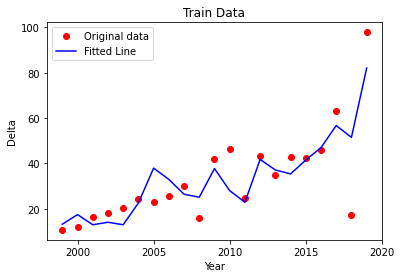

In [21]:
import matplotlib.pyplot as plt
# plt.plot(train[:-1,[0]], Y, 'ro', label='Original data')
# plt.plot(train[:-1,[0]], predict(X), 'blue', label='Fitted Line')
#plt.figure(figsize=(15, 7))
plt.plot(train[:,[0]], Y, 'ro', label='Original data')
plt.plot(train[:,[0]], predict(X), 'blue', label='Fitted Line')
plt.xticks([2000,2005,2010,2015,2020])
plt.title('Train Data')
plt.xlabel('Year')
plt.ylabel('Delta')
plt.legend()
plt.show()

# Test

## 시나리오1

In [22]:
test1 = pd.read_csv('/content/drive/MyDrive/dayeong/testdata133.csv')
t1 = test1
t1['x2']=-(t1['x2'])
t1['x1'] = (test1['x1']-test1['x1'].mean())/test1['x1'].std()
t1['x2'] = (test1['x2']-test1['x2'].mean())/test1['x2'].std()
#t1['x3'] = (test1['x3']-test1['x3'].mean())/test1['x3'].std()
#t1['x4'] = (test1['x4']-test1['x4'].mean())/test1['x4'].std()
#t1['x5'] = (test1['x5']-test1['x5'].mean())/test1['x5'].std()
#t1['x5'] = (test1['x6']-test1['x6'].mean())/test1['x6'].std()
t1['x7'] = (test1['x7']-test1['x7'].mean())/test1['x7'].std()
#t1['x3(gdp)'] = (test1['x3(gdp)']-test1['x3(gdp)'].mean())/test1['x3(gdp)'].std()
test11= np.array(t1, dtype=np.float32)
x_test11=test11[:,1:]
x_test11

array([[ 1.3631468 ,  1.5370678 , -1.        ,  2.1       ,  1.1       ,
         1.9       ,  1.6865481 ,  0.09      ,  0.4       ],
       [ 1.1507362 ,  1.1749314 ,  0.65      ,  2.1       ,  1.4       ,
         2.        ,  1.0540925 ,  0.09      ,  0.4       ],
       [ 0.82246524,  0.79468817,  2.3       ,  2.1       ,  1.4       ,
         2.        ,  1.0540925 ,  0.09      ,  0.4       ],
       [ 0.36546063,  0.33522764,  1.8       ,  2.1       ,  1.5       ,
         2.        , -0.21081851,  0.09      ,  0.4       ],
       [-0.0110854 , -0.18987012,  1.3       ,  2.1       ,  1.5       ,
         2.        , -0.21081851,  0.09      ,  0.4       ],
       [-0.4230332 , -0.6108537 ,  1.05      ,  2.        ,  1.4       ,
         2.        , -0.84327406,  0.09      ,  0.4       ],
       [-0.7191207 , -0.90282613,  0.8       ,  2.        ,  1.4       ,
         2.        , -0.84327406,  0.09      ,  0.4       ],
       [-1.0956668 , -1.0341005 ,  0.65      ,  1.9       ,  1

In [23]:
predict1 = []

In [24]:
predict1.append(predict(x_test11).numpy())
predict1

[array([[-135.65042  ],
        [ -99.01147  ],
        [ -73.28528  ],
        [   7.5225143],
        [  47.342094 ],
        [ 104.1179   ],
        [ 131.07254  ],
        [ 156.66461  ],
        [ 179.5892   ]], dtype=float32)]

In [25]:
predict11 =[]
for pr in predict1[0]:
  predict11.append(-np.expm1(pr))
predict1[0]= -predict1[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in expm1
  This is separate from the ipykernel package so we can avoid doing imports until


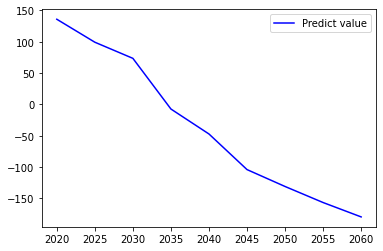

In [26]:
#plt.plot(test[:,[0]],predict11, 'ro', label='Predict value')
plt.plot(test11[:,[0]],predict1[0], 'b', label='Predict value')
plt.legend()
plt.show()

## 시나리오2

In [27]:
test2 = pd.read_csv('/content/drive/MyDrive/dayeong/testdata134.csv')
t2 = test2
t2

,year,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,2020,2204,522,-0.20,2.1,1.1,1.9,4.9,0.09,0.4
1,2025,2138,682,1.45,2.1,1.4,2.0,4.8,0.09,0.4
2,2030,2036,850,3.10,2.1,1.4,2.0,4.8,0.09,0.4
3,2035,1894,1053,2.60,2.1,1.5,2.0,4.6,0.09,0.4
4,2040,1777,1285,2.10,2.1,1.5,2.0,4.6,0.09,0.4
5,2045,1649,1471,2.00,2.0,1.4,2.0,4.5,0.09,0.4
6,2050,1557,1600,1.60,2.0,1.4,2.0,4.5,0.09,0.4
7,2055,1440,1658,1.45,1.9,1.4,2.0,4.5,0.09,0.4
8,2060,1329,1689,1.30,1.9,1.4,2.0,4.5,0.09,0.4


In [28]:
t2['x2']=-(t2['x2'])
t2['x1'] = (test2['x1']-test2['x1'].mean())/test2['x1'].std()
t2['x2'] = (test2['x2']-test2['x2'].mean())/test2['x2'].std()
#t2['x3'] = (test2['x3']-test2['x3'].mean())/test2['x3'].std()
t2['x7'] = (test2['x7']-test2['x7'].mean())/test2['x7'].std()
#t2['x3'] = (test2['x3']-test2['x3'].mean())/test2['x3'].std()
test22= np.array(t2, dtype=np.float32)
x_test22=test22[:,1:]
x_test22
predict2 = []

In [29]:
predict2.append(predict(x_test22).numpy())
#print(predict(x_test2))
predict2
predict22 =[]
for pr in predict2[0]:
  predict22.append(np.expm1(pr))

predict2[0] = - predict2[0] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in expm1
  


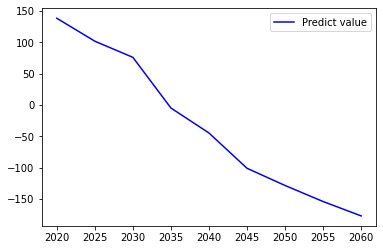

In [30]:
#plt.plot(test[:,[0]],predict11, 'ro', label='Predict value')
plt.plot(test22[:,[0]],predict2[0], 'b', label='Predict value')
plt.legend()
plt.show()

## 시나리오3

In [31]:
test3 = pd.read_csv('/content/drive/MyDrive/dayeong/testdata135.csv')
test3

,year,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,2020,2204,522,-0.90,2.1,1.1,1.9,4.9,0.09,0.4
1,2025,2138,682,0.75,2.1,1.4,2.0,4.8,0.09,0.4
2,2030,2036,850,2.40,2.1,1.4,2.0,4.8,0.09,0.4
3,2035,1894,1053,1.95,2.1,1.5,2.0,4.6,0.09,0.4
4,2040,1830,1285,1.50,2.1,1.5,2.0,4.6,0.09,0.4
5,2045,1726,1471,1.25,2.0,1.4,2.0,4.5,0.09,0.4
6,2050,1678,1600,1.10,2.0,1.4,2.0,4.5,0.09,0.4
7,2055,1500,1658,0.95,1.9,1.4,2.0,4.5,0.09,0.4
8,2060,1460,1689,0.90,1.9,1.4,2.0,4.5,0.09,0.4


In [32]:
t3 = test3
t3['x2']=-t3['x2']

In [33]:
t3['x1'] = (test3['x1']-test3['x1'].mean())/test3['x1'].std()
t3['x2'] = (test3['x2']-test3['x2'].mean())/test3['x2'].std()
#t3['x3'] = (test3['x3']-test3['x3'].mean())/test3['x3'].std()
t3['x7'] = (test3['x7']-test3['x7'].mean())/test3['x7'].std()
#t3['x3'] = (test3['x3']-test3['x3'].mean())/test3['x3'].std()
test33= np.array(t3, dtype=np.float32)
x_test33=test33[:,1:]
x_test33

array([[ 1.4140173e+00,  1.5370678e+00, -8.9999998e-01,  2.0999999e+00,
         1.1000000e+00,  1.9000000e+00,  1.6865481e+00,  9.0000004e-02,
         4.0000001e-01],
       [ 1.1647811e+00,  1.1749314e+00,  7.5000000e-01,  2.0999999e+00,
         1.4000000e+00,  2.0000000e+00,  1.0540925e+00,  9.0000004e-02,
         4.0000001e-01],
       [ 7.7959770e-01,  7.9468817e-01,  2.4000001e+00,  2.0999999e+00,
         1.4000000e+00,  2.0000000e+00,  1.0540925e+00,  9.0000004e-02,
         4.0000001e-01],
       [ 2.4336204e-01,  3.3522764e-01,  1.9500000e+00,  2.0999999e+00,
         1.5000000e+00,  2.0000000e+00, -2.1081851e-01,  9.0000004e-02,
         4.0000001e-01],
       [ 1.6783589e-03, -1.8987012e-01,  1.5000000e+00,  2.0999999e+00,
         1.5000000e+00,  2.0000000e+00, -2.1081851e-01,  9.0000004e-02,
         4.0000001e-01],
       [-3.9105761e-01, -6.1085367e-01,  1.2500000e+00,  2.0000000e+00,
         1.4000000e+00,  2.0000000e+00, -8.4327406e-01,  9.0000004e-02,
         4.

In [34]:
predict3 = []
predict3.append(predict(x_test33).numpy())
#print(predict(x_test3))
predict3
predict33 =[]
for pr in predict3[0]:
  predict33.append(np.expm1(pr))
predict3[0] = -predict3[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in expm1
  import sys


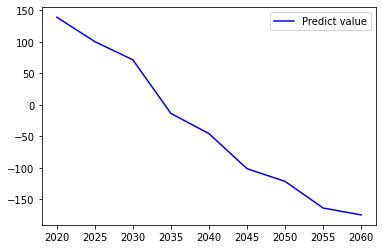

In [35]:
#plt.plot(test3[:,[0]],predict33, 'ro', label='Predict value')
plt.plot(test33[:,[0]],predict3[0], 'b', label='Predict value')
plt.legend()
plt.show()

## 최종 시나리오별 국민연금 적립금 고갈 예측

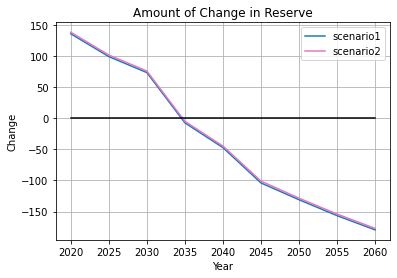

In [86]:
#plt.figure(figsize=(10,8))
plt.plot(test11[:,[0]],predict1[0], 'tab:blue', label='scenario1')
plt.plot(test22[:,[0]],predict2[0], 'tab:pink', label='scenario2')
#plt.plot(test33[:,[0]],predict3[0], 'g', label='scenario3')
#plt.yticks(np.arange(-130,100,10))
#plt.tick_params(axis='y',pad=15)
plt.plot(test11[:,[0]],[0,0,0,0,0,0,0,0,0],'black')
plt.grid(True)
plt.title('Amount of Change in Reserve')
plt.xlabel('Year')
plt.ylabel('Change')
plt.legend()
plt.show()

In [37]:
print(test11[:,[0]])
print(predict1[0])
print(predict2[0])
print(predict3[0])

[[2020.]
 [2025.]
 [2030.]
 [2035.]
 [2040.]
 [2045.]
 [2050.]
 [2055.]
 [2060.]]
[[ 135.65042  ]
 [  99.01147  ]
 [  73.28528  ]
 [  -7.5225143]
 [ -47.342094 ]
 [-104.1179   ]
 [-131.07254  ]
 [-156.66461  ]
 [-179.5892   ]]
[[ 138.13574  ]
 [ 101.4968   ]
 [  75.770615 ]
 [  -5.0371704]
 [ -44.85675  ]
 [-101.16656  ]
 [-128.58719  ]
 [-154.17926  ]
 [-177.10385  ]]
[[ 138.83597 ]
 [ 100.11587 ]
 [  71.173325]
 [ -13.956816]
 [ -45.999424]
 [-101.68949 ]
 [-121.84424 ]
 [-164.14397 ]
 [-175.10559 ]]


### 시나리오별 국민연금 적립금

In [38]:
m = 737
s1 = []
s2 = []
s3 = []

In [39]:
predict1[0]

array([[ 135.65042  ],
       [  99.01147  ],
       [  73.28528  ],
       [  -7.5225143],
       [ -47.342094 ],
       [-104.1179   ],
       [-131.07254  ],
       [-156.66461  ],
       [-179.5892   ]], dtype=float32)

In [40]:
stmp1 = []
for i, pr in enumerate(predict1[0]):
  if i == 0:
    print("justone")
    tmp = pr[0]
    continue
  else:
    stmp1.append((pr[0]-tmp)/5)
    tmp = pr[0]
stmp1

justone


[-7.327790832519531,
 -5.145237731933594,
 -16.161558532714842,
 -7.963916015625,
 -11.355160522460938,
 -5.390928649902344,
 -5.118414306640625,
 -4.584918212890625]

In [41]:
pre1= []
for i,pr in enumerate(predict1[0]):
  tmp = pr[0]
  pre1.append(tmp)
  if i!=8:
    for j in range(4):
      tmp+=stmp1[i]
      pre1.append(tmp)

for i,num in enumerate(pre1):
  print(2020+i, " : ", num)

2020  :  135.65042
2021  :  128.3226303100586
2022  :  120.99483947753907
2023  :  113.66704864501955
2024  :  106.33925781250002
2025  :  99.01147
2026  :  93.86622924804688
2027  :  88.72099151611329
2028  :  83.5757537841797
2029  :  78.4305160522461
2030  :  73.28528
2031  :  57.12371978759766
2032  :  40.962161254882815
2033  :  24.800602722167973
2034  :  8.63904418945313
2035  :  -7.5225143
2036  :  -15.486430358886718
2037  :  -23.450346374511717
2038  :  -31.414262390136717
2039  :  -39.378178405761716
2040  :  -47.342094
2041  :  -58.69725494384765
2042  :  -70.05241546630859
2043  :  -81.40757598876952
2044  :  -92.76273651123046
2045  :  -104.1179
2046  :  -109.50882568359376
2047  :  -114.8997543334961
2048  :  -120.29068298339845
2049  :  -125.6816116333008
2050  :  -131.07254
2051  :  -136.19095458984376
2052  :  -141.3093688964844
2053  :  -146.42778320312502
2054  :  -151.54619750976565
2055  :  -156.66461
2056  :  -161.24953002929686
2057  :  -165.83444824218748
2058 

In [42]:
tmp1 = m
s1=[]
s1.append(tmp1)
for i,pr in enumerate(pre1):
  tmp1+=pr
  s1.append(tmp1)

for i,pr in enumerate (s1):
  print(2019+i,", ",s1[i])

2019 ,  737
2020 ,  872.6504211425781
2021 ,  1000.9730514526367
2022 ,  1121.9678909301758
2023 ,  1235.6349395751954
2024 ,  1341.9741973876953
2025 ,  1440.9856643676758
2026 ,  1534.8518936157227
2027 ,  1623.572885131836
2028 ,  1707.1486389160157
2029 ,  1785.5791549682617
2030 ,  1858.8644332885742
2031 ,  1915.9881530761718
2032 ,  1956.9503143310546
2033 ,  1981.7509170532226
2034 ,  1990.3899612426758
2035 ,  1982.867446899414
2036 ,  1967.3810165405273
2037 ,  1943.9306701660155
2038 ,  1912.5164077758789
2039 ,  1873.1382293701172
2040 ,  1825.7961349487305
2041 ,  1767.0988800048829
2042 ,  1697.0464645385744
2043 ,  1615.6388885498047
2044 ,  1522.8761520385742
2045 ,  1418.7582550048828
2046 ,  1309.249429321289
2047 ,  1194.349674987793
2048 ,  1074.0589920043944
2049 ,  948.3773803710936
2050 ,  817.3048400878905
2051 ,  681.1138854980468
2052 ,  539.8045166015625
2053 ,  393.3767333984374
2054 ,  241.83053588867176
2055 ,  85.16592407226551
2056 ,  -76.08360595703135


In [43]:
stmp2 = []
for i, pr in enumerate(predict2[0]):
  if i == 0:
    print("justone")
    tmp = pr[0]
    continue
  else:
    stmp2.append((pr[0]-tmp)/5)
    tmp = pr[0]
stmp2

justone


[-7.327787780761719,
 -5.145237731933594,
 -16.161557006835938,
 -7.963916015625,
 -11.261961364746094,
 -5.484126281738281,
 -5.118414306640625,
 -4.584918212890625]

In [44]:
pre2= []
for i,pr in enumerate(predict2[0]):
  tmp = pr[0]
  pre2.append(tmp)
  if i!=8:
    for j in range(4):
      tmp+=stmp2[i]
      pre2.append(tmp)

for i,num in enumerate(pre2):
  print(2020+i, " : ", num)

2020  :  138.13574
2021  :  130.80795440673828
2022  :  123.48016662597655
2023  :  116.15237884521483
2024  :  108.8245910644531
2025  :  101.4968
2026  :  96.35156555175782
2027  :  91.20632781982422
2028  :  86.06109008789063
2029  :  80.91585235595704
2030  :  75.770615
2031  :  59.6090576171875
2032  :  43.44750061035157
2033  :  27.28594360351563
2034  :  11.124386596679692
2035  :  -5.0371704
2036  :  -13.00108642578125
2037  :  -20.96500244140625
2038  :  -28.928918457031248
2039  :  -36.89283447265625
2040  :  -44.85675
2041  :  -56.11871185302734
2042  :  -67.38067321777343
2043  :  -78.64263458251953
2044  :  -89.90459594726563
2045  :  -101.16656
2046  :  -106.65068359375
2047  :  -112.13480987548829
2048  :  -117.61893615722657
2049  :  -123.10306243896486
2050  :  -128.58719
2051  :  -133.70560302734376
2052  :  -138.8240173339844
2053  :  -143.94243164062502
2054  :  -149.06084594726565
2055  :  -154.17926
2056  :  -158.76417846679686
2057  :  -163.34909667968748
2058  :

In [45]:
tmp2 = m
s2=[]
s2.append(tmp2)
for i,pr in enumerate(pre2):
  tmp2+=pr
  s2.append(tmp2)

for i,pr in enumerate (s2):
  print(2019+i,", ",s2[i])

2019 ,  737
2020 ,  875.1357421875
2021 ,  1005.9436965942383
2022 ,  1129.4238632202148
2023 ,  1245.5762420654296
2024 ,  1354.4008331298828
2025 ,  1455.8976364135742
2026 ,  1552.249201965332
2027 ,  1643.4555297851564
2028 ,  1729.516619873047
2029 ,  1810.432472229004
2030 ,  1886.2030868530273
2031 ,  1945.812144470215
2032 ,  1989.2596450805665
2033 ,  2016.545588684082
2034 ,  2027.6699752807617
2035 ,  2022.6328048706055
2036 ,  2009.6317184448242
2037 ,  1988.6667160034178
2038 ,  1959.7377975463867
2039 ,  1922.8449630737305
2040 ,  1877.9882125854492
2041 ,  1821.8695007324218
2042 ,  1754.4888275146484
2043 ,  1675.8461929321288
2044 ,  1585.9415969848633
2045 ,  1484.7750396728516
2046 ,  1378.1243560791015
2047 ,  1265.9895462036131
2048 ,  1148.3706100463867
2049 ,  1025.2675476074219
2050 ,  896.6803588867188
2051 ,  762.974755859375
2052 ,  624.1507385253906
2053 ,  480.20830688476553
2054 ,  331.1474609374999
2055 ,  176.96820068359364
2056 ,  18.204022216796773
205

In [46]:
stmp3 = []
for i, pr in enumerate(predict3[0]):
  if i == 0:
    print("justone")
    tmp = pr[0]
    continue
  else:
    stmp3.append((pr[0]-tmp)/5)
    tmp = pr[0]
stmp3

justone


[-7.744020080566406,
 -5.788508605957031,
 -17.026028442382813,
 -6.408522033691407,
 -11.138013458251953,
 -4.030949401855469,
 -8.459945678710938,
 -2.1923248291015627]

In [47]:
pre3= []
for i,pr in enumerate(predict3[0]):
  tmp = pr[0]
  pre3.append(tmp)
  if i!=8:
    for j in range(4):
      tmp+=stmp2[i]
      pre3.append(tmp)

for i,num in enumerate(pre3):
  print(2020+i, " : ", num)

2020  :  138.83597
2021  :  131.5081802368164
2022  :  124.18039245605468
2023  :  116.85260467529295
2024  :  109.52481689453123
2025  :  100.11587
2026  :  94.9706298828125
2027  :  89.82539215087891
2028  :  84.68015441894532
2029  :  79.53491668701173
2030  :  71.173325
2031  :  55.011767578125
2032  :  38.85021057128907
2033  :  22.68865356445313
2034  :  6.527096557617192
2035  :  -13.956816
2036  :  -21.92073173522949
2037  :  -29.88464775085449
2038  :  -37.848563766479494
2039  :  -45.8124797821045
2040  :  -45.999424
2041  :  -57.26138534545898
2042  :  -68.52334671020508
2043  :  -79.78530807495117
2044  :  -91.04726943969727
2045  :  -101.68949
2046  :  -107.17361755371094
2047  :  -112.65774383544922
2048  :  -118.14187011718751
2049  :  -123.62599639892579
2050  :  -121.84424
2051  :  -126.96265258789063
2052  :  -132.08106689453126
2053  :  -137.1994812011719
2054  :  -142.31789550781252
2055  :  -164.14397
2056  :  -168.7288848876953
2057  :  -173.31380310058591
2058  :

In [48]:
tmp3 = m
s3=[]
s3.append(tmp3)
for i,pr in enumerate(pre3):
  tmp3+=pr
  s3.append(tmp3)

for i,pr in enumerate (s3):
  print(2019+i,", ",s3[i])

2019 ,  737
2020 ,  875.8359680175781
2021 ,  1007.3441482543946
2022 ,  1131.5245407104492
2023 ,  1248.377145385742
2024 ,  1357.9019622802734
2025 ,  1458.0178298950195
2026 ,  1552.988459777832
2027 ,  1642.813851928711
2028 ,  1727.4940063476563
2029 ,  1807.028923034668
2030 ,  1878.202247619629
2031 ,  1933.214015197754
2032 ,  1972.064225769043
2033 ,  1994.7528793334961
2034 ,  2001.2799758911133
2035 ,  1987.3231601715088
2036 ,  1965.4024284362793
2037 ,  1935.5177806854247
2038 ,  1897.6692169189453
2039 ,  1851.8567371368408
2040 ,  1805.857313156128
2041 ,  1748.5959278106689
2042 ,  1680.0725811004638
2043 ,  1600.2872730255126
2044 ,  1509.2400035858154
2045 ,  1407.5505123138428
2046 ,  1300.3768947601318
2047 ,  1187.7191509246825
2048 ,  1069.577280807495
2049 ,  945.9512844085693
2050 ,  824.1070461273193
2051 ,  697.1443935394287
2052 ,  565.0633266448974
2053 ,  427.8638454437255
2054 ,  285.545949935913
2055 ,  121.40198326110828
2056 ,  -47.326901626587016
2057 

#### 적립금 고갈 시각화

In [49]:
year =[]
zero = []
for i in range(0,41):
  year.append(2020+i)
  zero.append(0)

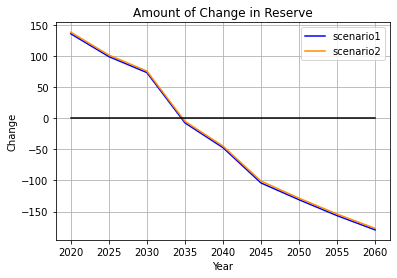

In [50]:
#plt.figure(figsize=(10,8))
plt.plot(year,pre1, 'b', label='scenario1')
plt.plot(year,pre2, 'darkorange', label='scenario2')
#plt.plot(test33[:,[0]],predict3[0], 'g', label='scenario3')
#plt.yticks(np.arange(-130,100,10))
#plt.tick_params(axis='y',pad=15)
plt.plot(year,zero,'black')
plt.grid(True)
plt.title('Amount of Change in Reserve')
plt.xlabel('Year')
plt.ylabel('Change')
plt.legend()
plt.show()

In [51]:
year =[]
zero = []
for i in range(0,42):
  year.append(2019+i)
  zero.append(0)

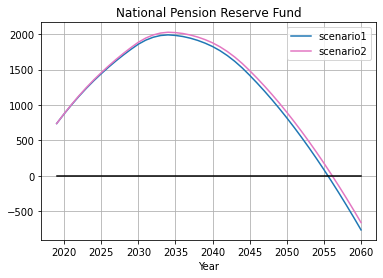

In [87]:
#plt.figure(figsize=(15,10))
plt.plot(year,s1, 'tab:blue', label='scenario1')
plt.plot(year,s2, 'tab:pink', label='scenario2')
#plt.plot(year,s3, 'g', label='scenario3')

plt.plot(year,zero,'black')
plt.xticks([2020,2025,2030,2035,2040,2045,2050,2055,2060])
plt.grid(True)
plt.title('National Pension Reserve Fund')
plt.xlabel('Year')
plt.legend()
plt.show()

# 소득대체율, 보험료율 반영

## Train

In [51]:
df = pd.read_csv('/content/drive/MyDrive/dayeong/newtrain2.csv')
#df=df[:-1]
#df['y']=df['y']/100
df

,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
0,1999,1626.1889,124.9257,11.5,2.1,6.46,0.8,14.850289,0.09,0.60,10.7
1,2000,1620.9581,92.7545,9.1,7.6,5.65,2.3,-39.791510,0.09,0.60,11.9
2,2001,1627.7826,94.8164,4.9,6.0,1.95,4.1,89.337077,0.09,0.60,16.5
3,2002,1649.8932,105.2327,7.8,6.7,4.06,2.8,7.094840,0.09,0.60,18.3
4,2003,1718.1778,116.9441,3.1,6.4,1.43,3.5,10.868027,0.09,0.60,20.4
5,2004,1707.0217,153.3059,5.2,5.2,-0.17,3.6,42.917210,0.09,0.60,24.3
6,2005,1712.4449,175.7674,4.3,4.7,0.68,2.8,-20.012817,0.09,0.60,22.9
7,2006,1773.9939,198.5502,5.3,4.8,2.07,2.2,22.657748,0.09,0.60,25.7
8,2007,1826.6742,224.4477,5.8,4.8,2.50,2.5,35.773878,0.09,0.60,29.9
9,2008,1833.5409,251.7579,3.0,4.9,1.72,4.8,-103.054887,0.09,0.50,15.9


In [52]:
norm=df
norm['x2']=-norm['x2']
norm['x1'] = (df['x1']-df['x1'].mean())/df['x1'].std()
norm['x2'] = (df['x2']-df['x2'].mean())/df['x2'].std()
#norm['x3']=df['x3'].astype(float)
norm['x3'] = (df['x3']-df['x3'].mean())/df['x3'].std()
norm['x7'] = (df['x7']-df['x7'].mean())/df['x7'].std()
#norm['y'] = (df['y']-df['y'].mean())/df['y'].std()
#norm['y']=np.log1p(norm['y']) # 로그
norm.head()
train= np.array(norm, dtype=np.float32)
# slice data
# X = train[:-1, 1:-1]
# Y = train[:-1, [-1]]
X = train[:, 1:-1]
Y = train[:, [-1]]

In [53]:
W = tf.Variable(tf.random.normal((9, 1)))
b = tf.Variable(tf.random.normal((1,)))

In [54]:
learning_rate = 0.01

In [55]:
# hypothesis, prediction function
def predict(X):
    return tf.matmul(X, W) + b

In [56]:
print("epoch | cost")
n_epochs = 10000
for i in range(n_epochs+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((tf.square(predict(X) - Y)))

    # calculates the gradients of the loss
    W_grad, b_grad = tape.gradient(cost, [W, b])

    # updates parameters (W and b)
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 100 == 0:
        print("{:5} | {:10.4f}".format(i, cost.numpy()))

epoch | cost
    0 |  1223.2936
  100 |   199.2119
  200 |   184.1596
  300 |   173.7914
  400 |   166.2327
  500 |   160.4376
  600 |   155.7948
  700 |   151.9399
  800 |   148.6513
  900 |   145.7894
 1000 |   143.2631
 1100 |   141.0104
 1200 |   138.9868
 1300 |   137.1590
 1400 |   135.5008
 1500 |   133.9911
 1600 |   132.6124
 1700 |   131.3496
 1800 |   130.1899
 1900 |   129.1221
 2000 |   128.1366
 2100 |   127.2246
 2200 |   126.3786
 2300 |   125.5918
 2400 |   124.8585
 2500 |   124.1732
 2600 |   123.5314
 2700 |   122.9289
 2800 |   122.3622
 2900 |   121.8278
 3000 |   121.3228
 3100 |   120.8448
 3200 |   120.3914
 3300 |   119.9606
 3400 |   119.5504
 3500 |   119.1592
 3600 |   118.7857
 3700 |   118.4285
 3800 |   118.0863
 3900 |   117.7582
 4000 |   117.4432
 4100 |   117.1403
 4200 |   116.8488
 4300 |   116.5682
 4400 |   116.2975
 4500 |   116.0364
 4600 |   115.7843
 4700 |   115.5407
 4800 |   115.3051
 4900 |   115.0772
 5000 |   114.8565
 5100 |   114.6428

In [57]:
W.numpy()

array([[-33.702732 ],
       [-42.017105 ],
       [ -1.7535006],
       [  4.9598227],
       [ -3.8682346],
       [ -9.354825 ],
       [ -6.4845347],
       [  1.668624 ],
       [ 17.258877 ]], dtype=float32)

In [58]:
b.numpy()

array([31.324903], dtype=float32)

In [59]:
tf.matmul(X, W) + b

<tf.Tensor: shape=(21, 1), dtype=float32, numpy=
array([[10.175291 ],
       [19.447842 ],
       [10.8418865],
       [16.484928 ],
       [14.8904705],
       [25.40461  ],
       [34.036346 ],
       [31.370726 ],
       [26.293327 ],
       [16.383951 ],
       [45.10092  ],
       [32.518414 ],
       [26.821972 ],
       [36.536945 ],
       [35.726604 ],
       [37.17172  ],
       [42.664486 ],
       [48.041782 ],
       [56.115677 ],
       [53.096794 ],
       [78.73057  ]], dtype=float32)>

### Predict

In [60]:
Y # labels, 실제값|

array([[10.7],
       [11.9],
       [16.5],
       [18.3],
       [20.4],
       [24.3],
       [22.9],
       [25.7],
       [29.9],
       [15.9],
       [42.2],
       [46.3],
       [24.9],
       [43.1],
       [35. ],
       [42.9],
       [42.5],
       [46. ],
       [63.3],
       [17.1],
       [97.9]], dtype=float32)

In [61]:
predict(X).numpy() # prediction, 예측값

array([[10.175291 ],
       [19.447842 ],
       [10.8418865],
       [16.484928 ],
       [14.8904705],
       [25.40461  ],
       [34.036346 ],
       [31.370726 ],
       [26.293327 ],
       [16.383951 ],
       [45.10092  ],
       [32.518414 ],
       [26.821972 ],
       [36.536945 ],
       [35.726604 ],
       [37.17172  ],
       [42.664486 ],
       [48.041782 ],
       [56.115677 ],
       [53.096794 ],
       [78.73057  ]], dtype=float32)

### 시각화

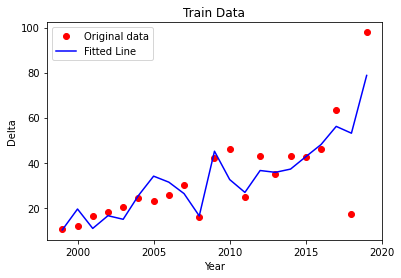

In [62]:
import matplotlib.pyplot as plt
plt.plot(train[:,[0]], Y, 'ro', label='Original data')
plt.plot(train[:,[0]], predict(X), 'blue', label='Fitted Line')
plt.xticks([2000,2005,2010,2015,2020])
plt.title('Train Data')
plt.xlabel('Year')
plt.ylabel('Delta')
plt.legend()
plt.show()

## Test

### 시나리오1

In [53]:
test4 = pd.read_csv('/content/drive/MyDrive/dayeong/testdata134.csv')
t4 = test4

In [54]:
t4['x2']=-t4['x2']
t4['x1'] = (test4['x1']-test4['x1'].mean())/test4['x1'].std()
t4['x2'] = (test4['x2']-test4['x2'].mean())/test4['x2'].std()
t4['x7'] = (test4['x7']-test4['x7'].mean())/test4['x7'].std()
#t4['x3'] = (test4['x3']-test4['x3'].mean())/test4['x3'].std()
t4.head()

,year,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,2020,1.363147,1.537068,-0.20,2.1,1.1,1.9,1.686548,0.09,0.4
1,2025,1.150736,1.174931,1.45,2.1,1.4,2.0,1.054093,0.09,0.4
2,2030,0.822465,0.794688,3.10,2.1,1.4,2.0,1.054093,0.09,0.4
3,2035,0.365461,0.335228,2.60,2.1,1.5,2.0,-0.210819,0.09,0.4
4,2040,-0.011085,-0.189870,2.10,2.1,1.5,2.0,-0.210819,0.09,0.4


In [55]:
test44= np.array(t4, dtype=np.float32)
x_test44=test44[:,1:]
x_test44

array([[ 1.3631468 ,  1.5370678 , -0.2       ,  2.1       ,  1.1       ,
         1.9       ,  1.6865481 ,  0.09      ,  0.4       ],
       [ 1.1507362 ,  1.1749314 ,  1.45      ,  2.1       ,  1.4       ,
         2.        ,  1.0540925 ,  0.09      ,  0.4       ],
       [ 0.82246524,  0.79468817,  3.1       ,  2.1       ,  1.4       ,
         2.        ,  1.0540925 ,  0.09      ,  0.4       ],
       [ 0.36546063,  0.33522764,  2.6       ,  2.1       ,  1.5       ,
         2.        , -0.21081851,  0.09      ,  0.4       ],
       [-0.0110854 , -0.18987012,  2.1       ,  2.1       ,  1.5       ,
         2.        , -0.21081851,  0.09      ,  0.4       ],
       [-0.4230332 , -0.6108537 ,  2.        ,  2.        ,  1.4       ,
         2.        , -0.84327406,  0.09      ,  0.4       ],
       [-0.7191207 , -0.90282613,  1.6       ,  2.        ,  1.4       ,
         2.        , -0.84327406,  0.09      ,  0.4       ],
       [-1.0956668 , -1.0341005 ,  1.45      ,  1.9       ,  1

In [56]:
predict4 = []
predict4.append(predict(x_test44).numpy())
#print(predict(x_test4))
predict4
predict44 =[]
for pr in predict4[0]:
  predict44.append(np.expm1(pr))
predict4[0] = -predict4[0] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in expm1
  import sys


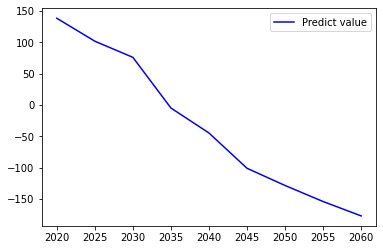

In [57]:
#plt.plot(test3[:,[0]],predict33, 'ro', label='Predict value')
plt.plot(test44[:,[0]],predict4[0], 'b', label='Predict value')
plt.legend()
plt.show()

### 시나리오2

In [58]:
test5 = pd.read_csv('/content/drive/MyDrive/dayeong/testdata37.csv')
t5= test5
t5['x2']=-t5['x2']
t5['x1'] = (test5['x1']-test5['x1'].mean())/test5['x1'].std()
t5['x2'] = (test5['x2']-test5['x2'].mean())/test5['x2'].std()
t5['x7'] = (test5['x7']-test5['x7'].mean())/test5['x7'].std()
#t5['x3'] = (test5['x3']-test5['x3'].mean())/test5['x3'].std()
test55= np.array(t5, dtype=np.float32)
x_test55=test55[:,1:]

In [59]:
predict5 = []

In [60]:
predict5.append(predict(x_test55).numpy())
#print(predict(x_test5))
predict5
predict55=[]
for pr in predict5[0]:
  predict55.append(np.expm1(pr))
predict5[0] = - predict5[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in expm1
  


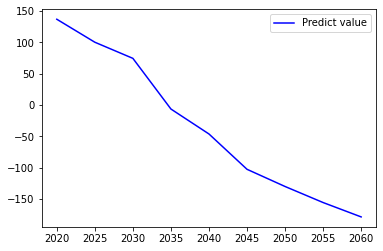

In [61]:
#plt.plot(test3[:,[0]],predict33, 'ro', label='Predict value')
plt.plot(test55[:,[0]],predict5[0], 'b', label='Predict value')
plt.legend()
plt.show()

### 시나리오3

In [62]:
test6 = pd.read_csv('/content/drive/MyDrive/dayeong/testdata38.csv')
t6= test6
t6['x2']=-t6['x2']
t6['x1'] = (test6['x1']-test6['x1'].mean())/test6['x1'].std()
t6['x2'] = (test6['x2']-test6['x2'].mean())/test6['x2'].std()
t6['x7'] = (test6['x7']-test6['x7'].mean())/test6['x7'].std()
#t6['x3'] = (test6['x3']-test6['x3'].mean())/test6['x3'].std()
test66= np.array(t6, dtype=np.float32)
x_test66=test66[:,1:]

In [63]:
predict6 = []

In [64]:
predict6.append(predict(x_test66).numpy())
#print(predict(x_test6))
predict6
predict66=[]
for pr in predict6[0]:
  predict66.append(np.expm1(pr))
predict6[0] = -predict6[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in expm1
  


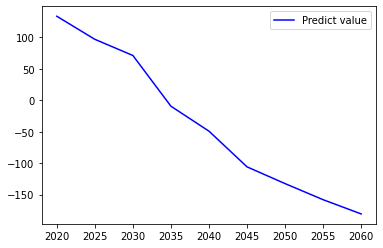

In [65]:
#plt.plot(test3[:,[0]],predict33, 'ro', label='Predict value')
plt.plot(test66[:,[0]],predict6[0], 'b', label='Predict value')
plt.legend()
plt.show()

### 최종 시나리오별 국민연금 적립금 고갈 예측

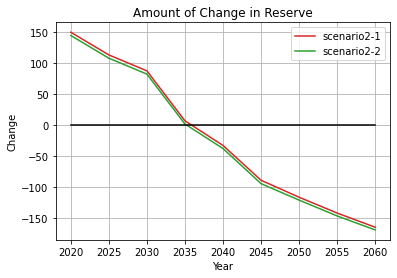

In [117]:
#plt.figure(figsize=(15,10))
#plt.plot(test44[:,[0]],predict4[0], 'b', label='scenario2')
plt.plot(test55[:,[0]],predict5[0]+13, 'tab:red', label='scenario2-1')
plt.plot(test66[:,[0]],predict6[0]+11, 'tab:green', label='scenario2-2')
#plt.yticks(np.arange(-130,100,10))
#plt.tick_params(axis='y',pad=15)
plt.plot(test11[:,[0]],[0,0,0,0,0,0,0,0,0],'black')
plt.grid(True)
plt.title('Amount of Change in Reserve')
plt.xlabel('Year')
plt.ylabel('Change')
plt.legend()
plt.show()

#### 시나리오별 국민연금 적립금

In [67]:
m = 737
s4 = []
s5 = []
s6 = []

In [68]:
stmp4 = []
for i, pr in enumerate(predict4[0]):
  if i == 0:
    print("justone")
    tmp = pr[0]
    continue
  else:
    stmp4.append((pr[0]-tmp)/5)
    tmp = pr[0]
stmp4

justone


[-7.327787780761719,
 -5.145237731933594,
 -16.161557006835938,
 -7.963916015625,
 -11.261961364746094,
 -5.484126281738281,
 -5.118414306640625,
 -4.584918212890625]

In [69]:
pre4= []
for i,pr in enumerate(predict4[0]):
  tmp = pr[0]
  pre4.append(tmp)
  if i!=8:
    for j in range(4):
      tmp+=stmp4[i]
      pre4.append(tmp)

for i,num in enumerate(pre4):
  print(2020+i, " : ", num)

2020  :  138.13574
2021  :  130.80795440673828
2022  :  123.48016662597655
2023  :  116.15237884521483
2024  :  108.8245910644531
2025  :  101.4968
2026  :  96.35156555175782
2027  :  91.20632781982422
2028  :  86.06109008789063
2029  :  80.91585235595704
2030  :  75.770615
2031  :  59.6090576171875
2032  :  43.44750061035157
2033  :  27.28594360351563
2034  :  11.124386596679692
2035  :  -5.0371704
2036  :  -13.00108642578125
2037  :  -20.96500244140625
2038  :  -28.928918457031248
2039  :  -36.89283447265625
2040  :  -44.85675
2041  :  -56.11871185302734
2042  :  -67.38067321777343
2043  :  -78.64263458251953
2044  :  -89.90459594726563
2045  :  -101.16656
2046  :  -106.65068359375
2047  :  -112.13480987548829
2048  :  -117.61893615722657
2049  :  -123.10306243896486
2050  :  -128.58719
2051  :  -133.70560302734376
2052  :  -138.8240173339844
2053  :  -143.94243164062502
2054  :  -149.06084594726565
2055  :  -154.17926
2056  :  -158.76417846679686
2057  :  -163.34909667968748
2058  :

In [70]:
tmp4 = m
s4=[]
s4.append(tmp4)
for i,pr in enumerate(pre4):
  tmp4+=pr
  s4.append(tmp4)

for i,pr in enumerate (s4):
  print(2019+i,", ",s4[i])

2019 ,  737
2020 ,  875.1357421875
2021 ,  1005.9436965942383
2022 ,  1129.4238632202148
2023 ,  1245.5762420654296
2024 ,  1354.4008331298828
2025 ,  1455.8976364135742
2026 ,  1552.249201965332
2027 ,  1643.4555297851564
2028 ,  1729.516619873047
2029 ,  1810.432472229004
2030 ,  1886.2030868530273
2031 ,  1945.812144470215
2032 ,  1989.2596450805665
2033 ,  2016.545588684082
2034 ,  2027.6699752807617
2035 ,  2022.6328048706055
2036 ,  2009.6317184448242
2037 ,  1988.6667160034178
2038 ,  1959.7377975463867
2039 ,  1922.8449630737305
2040 ,  1877.9882125854492
2041 ,  1821.8695007324218
2042 ,  1754.4888275146484
2043 ,  1675.8461929321288
2044 ,  1585.9415969848633
2045 ,  1484.7750396728516
2046 ,  1378.1243560791015
2047 ,  1265.9895462036131
2048 ,  1148.3706100463867
2049 ,  1025.2675476074219
2050 ,  896.6803588867188
2051 ,  762.974755859375
2052 ,  624.1507385253906
2053 ,  480.20830688476553
2054 ,  331.1474609374999
2055 ,  176.96820068359364
2056 ,  18.204022216796773
205

In [71]:
stmp5 = []
for i, pr in enumerate(predict5[0]):
  if i == 0:
    print("justone")
    tmp = pr[0]
    continue
  else:
    stmp5.append((pr[0]-tmp)/5)
    tmp = pr[0]
stmp5

justone


[-7.332402038574219,
 -5.145240783691406,
 -16.161557006835938,
 -7.963915252685547,
 -11.266572570800781,
 -5.484127807617187,
 -5.118414306640625,
 -4.584918212890625]

In [72]:
pre5= []
for i,pr in enumerate(predict5[0]):
  tmp = pr[0]
  pre5.append(tmp)
  if i!=8:
    for j in range(4):
      tmp+=stmp5[i]
      pre5.append(tmp)

for i,num in enumerate(pre4):
  print(2020+i, " : ", num)

2020  :  138.13574
2021  :  130.80795440673828
2022  :  123.48016662597655
2023  :  116.15237884521483
2024  :  108.8245910644531
2025  :  101.4968
2026  :  96.35156555175782
2027  :  91.20632781982422
2028  :  86.06109008789063
2029  :  80.91585235595704
2030  :  75.770615
2031  :  59.6090576171875
2032  :  43.44750061035157
2033  :  27.28594360351563
2034  :  11.124386596679692
2035  :  -5.0371704
2036  :  -13.00108642578125
2037  :  -20.96500244140625
2038  :  -28.928918457031248
2039  :  -36.89283447265625
2040  :  -44.85675
2041  :  -56.11871185302734
2042  :  -67.38067321777343
2043  :  -78.64263458251953
2044  :  -89.90459594726563
2045  :  -101.16656
2046  :  -106.65068359375
2047  :  -112.13480987548829
2048  :  -117.61893615722657
2049  :  -123.10306243896486
2050  :  -128.58719
2051  :  -133.70560302734376
2052  :  -138.8240173339844
2053  :  -143.94243164062502
2054  :  -149.06084594726565
2055  :  -154.17926
2056  :  -158.76417846679686
2057  :  -163.34909667968748
2058  :

In [104]:
tmp5 = m
s5=[]
s5.append(tmp5)
for i,pr in enumerate(pre5):
  if i > 20:
    tmp5+=(pr/1.2)
  else:
    tmp5+=(pr*1.2)
  s5.append(tmp5)

for i,pr in enumerate (s5):
  print(2019+i,", ",s5[i])

2019 ,  737
2020 ,  901.4119018554687
2021 ,  1057.0249212646484
2022 ,  1203.839058227539
2023 ,  1341.8543127441405
2024 ,  1471.070684814453
2025 ,  1591.4881744384763
2026 ,  1705.7313751220702
2027 ,  1813.8002868652343
2028 ,  1915.6949096679687
2029 ,  2011.4152435302733
2030 ,  2100.9612884521484
2031 ,  2171.11346496582
2032 ,  2221.8717730712888
2033 ,  2253.236212768554
2034 ,  2265.206784057617
2035 ,  2257.783491516113
2036 ,  2240.8035006713862
2037 ,  2214.266811523437
2038 ,  2178.173424072265
2039 ,  2132.52333831787
2040 ,  2077.316554260253
2041 ,  2029.589699300129
2042 ,  1972.474033864338
2043 ,  1905.9695579528798
2044 ,  1830.076271565754
2045 ,  1744.794174702961
2046 ,  1654.9419713338204
2047 ,  1560.5196614583322
2048 ,  1461.5272450764962
2049 ,  1357.9647221883126
2050 ,  1249.8320927937814
2051 ,  1137.4341181437162
2052 ,  1020.7707982381172
2053 ,  899.8421330769844
2054 ,  774.6481226603178
2055 ,  645.1887669881172
2056 ,  511.90864613850783
2057 ,  3

In [105]:
stmp6 = []
for i, pr in enumerate(predict6[0]):
  if i == 0:
    print("justone")
    tmp = pr[0]
    continue
  else:
    stmp6.append((pr[0]-tmp)/5)
    tmp = pr[0]
stmp6

justone


[-7.337007141113281,
 -5.1452392578125,
 -16.135101318359375,
 -7.932849884033203,
 -11.355162811279296,
 -5.328794860839844,
 -5.118408203125,
 -4.52279052734375]

In [106]:
pre6= []
for i,pr in enumerate(predict6[0]):
  tmp = pr[0]
  pre6.append(tmp)
  if i!=8:
    for j in range(4):
      tmp+=stmp4[i]
      pre6.append(tmp)

for i,num in enumerate(pre6):
  print(2020+i, " : ", num)

2020  :  133.73242
2021  :  126.40463409423828
2022  :  119.07684631347655
2023  :  111.74905853271483
2024  :  104.4212707519531
2025  :  97.047386
2026  :  91.9021484375
2027  :  86.75691070556641
2028  :  81.61167297363282
2029  :  76.46643524169923
2030  :  71.32119
2031  :  55.15963287353516
2032  :  38.998075866699224
2033  :  22.836518859863286
2034  :  6.674961853027348
2035  :  -9.354317
2036  :  -17.31823272705078
2037  :  -25.28214874267578
2038  :  -33.24606475830078
2039  :  -41.209980773925786
2040  :  -49.018566
2041  :  -60.28052749633789
2042  :  -71.54248886108398
2043  :  -82.80445022583008
2044  :  -94.06641159057618
2045  :  -105.79438
2046  :  -111.27850646972657
2047  :  -116.76263275146485
2048  :  -122.24675903320313
2049  :  -127.73088531494142
2050  :  -132.43835
2051  :  -137.55676879882813
2052  :  -142.67518310546876
2053  :  -147.7935974121094
2054  :  -152.91201171875002
2055  :  -158.0304
2056  :  -162.6153137207031
2057  :  -167.20023193359373
2058  : 

In [107]:
tmp6 = m
s6=[]
s6.append(tmp6)
for i,pr in enumerate(pre6):
  if i >20:
    tmp6+=(pr/1.2)
  else:
    tmp6+=(pr*1.2)
  s6.append(tmp6)

for i,pr in enumerate (s6):
  print(2019+i,", ",s6[i])

2019 ,  737
2020 ,  897.47890625
2021 ,  1049.1644671630859
2022 ,  1192.0566827392577
2023 ,  1326.1555529785155
2024 ,  1451.4610778808592
2025 ,  1567.9179412841795
2026 ,  1678.2005194091796
2027 ,  1782.3088122558593
2028 ,  1880.2428198242187
2029 ,  1972.0025421142577
2030 ,  2057.587969970703
2031 ,  2123.779529418945
2032 ,  2170.577220458984
2033 ,  2197.9810430908196
2034 ,  2205.9909973144527
2035 ,  2194.7658172607416
2036 ,  2173.9839379882806
2037 ,  2143.6453594970694
2038 ,  2103.7500817871087
2039 ,  2054.298104858398
2040 ,  1995.4758255004876
2041 ,  1945.2420525868727
2042 ,  1885.6233118693026
2043 ,  1816.6196033477775
2044 ,  1738.2309270222972
2045 ,  1650.068943532307
2046 ,  1557.3368548075348
2047 ,  1460.0346608479808
2048 ,  1358.162361653645
2049 ,  1251.719957224527
2050 ,  1141.3546618143707
2051 ,  1026.7240211486805
2052 ,  907.8280352274566
2053 ,  784.6667040506987
2054 ,  657.2400276184071
2055 ,  525.5480313618966
2056 ,  390.0352699279773
2057 , 

#### 시각화

In [108]:
year =[]
zero = []
for i in range(0,42):
  year.append(2019+i)
  zero.append(0)

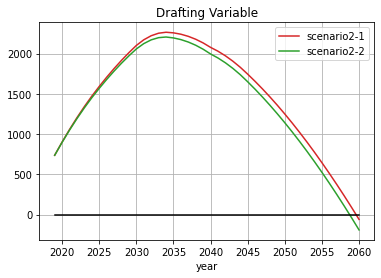

In [109]:
#plt.figure(figsize=(15,10))
#year = [2020,2025,2030,2035,2040,2045,2050,2055,2060,2065]
#plt.plot(year,s3,'')
#plt.plot(year,s4, 'b', label='scenario2')
plt.plot(year,s5, 'tab:red', label='scenario2-1')
plt.plot(year,s6, 'tab:green', label='scenario2-2')
plt.plot(year,zero,'black')
plt.grid(True)
plt.title('Drafting Variable')
plt.xticks(year)
plt.xlabel('year')
#plt.yticks(np.arange(-130,100,10))
#plt.tick_params(axis='y',pad=15)
plt.xticks([2020,2025,2030,2035,2040,2045,2050,2055,2060])
plt.legend()
plt.show()

## 결과 분석 및 비교

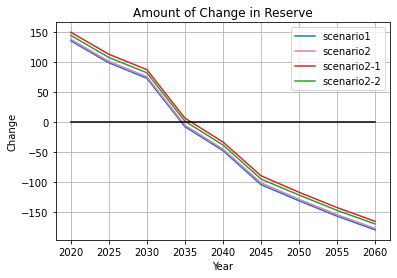

In [116]:
#plt.figure(figsize=(15,10))
plt.plot(test44[:,[0]],predict1[0],'tab:blue',label='scenario1')
plt.plot(test44[:,[0]],predict2[0], 'tab:pink', label='scenario2')
plt.plot(test55[:,[0]],predict5[0]+13, 'tab:red', label='scenario2-1')
plt.plot(test66[:,[0]],predict6[0]+11, 'tab:green', label='scenario2-2')
#plt.yticks(np.arange(-130,100,10))
#plt.tick_params(axis='y',pad=15)
plt.plot(test11[:,[0]],[0,0,0,0,0,0,0,0,0],'black')
plt.grid(True)
plt.title('Amount of Change in Reserve')
plt.xlabel('Year')
plt.ylabel('Change')
plt.legend()
plt.show()

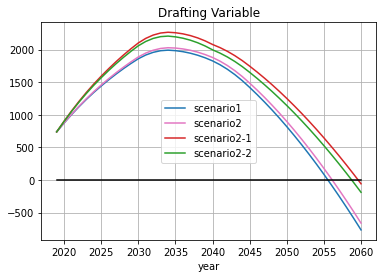

In [119]:
#plt.figure(figsize=(15,10))
#year = [2020,2025,2030,2035,2040,2045,2050,2055,2060,2065]
#plt.plot(year,s3,'')
#plt.plot(year,s4, 'b', label='scenario2')
plt.plot(year,s1, 'tab:blue', label='scenario1')
plt.plot(year,s2, 'tab:pink', label='scenario2')
plt.plot(year,s5, 'tab:red', label='scenario2-1')
plt.plot(year,s6, 'tab:green', label='scenario2-2')
plt.plot(year,zero,'black')
plt.grid(True)
plt.title('Drafting Variable')
plt.xticks(year)
plt.xlabel('year')
#plt.yticks(np.arange(-130,100,10))
#plt.tick_params(axis='y',pad=15)
plt.xticks([2020,2025,2030,2035,2040,2045,2050,2055,2060])
plt.legend()
plt.show()